In [2]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
moon_stuff = pd.read_csv("Resources/history_data.csv")

moon_stuff["Date"] = pd.to_datetime(moon_stuff["Date time"])
moon_stuff.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,...,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase,Date
0,"Harrisburg, PA, United States",01/01/2015,40.9,17.8,31.4,12.7,NaN,0.01,NaN,NaN,...,229.83,25.5,9.9,1.5,45.12,Rain,2015-01-01T16:52:00-05:00,2015-01-01T07:30:16-05:00,0.41,2015-01-01
1,"Harrisburg, PA, United States",01/02/2015,43.0,26.3,34.6,26.8,NaN,0.00,NaN,NaN,...,195.58,34.4,9.9,7.6,52.17,Clear,2015-01-02T16:52:51-05:00,2015-01-02T07:30:22-05:00,0.45,2015-01-02
2,"Harrisburg, PA, United States",01/03/2015,35.8,22.1,30.7,22.2,NaN,0.57,NaN,NaN,...,73.17,NaN,5.0,73.0,86.17,"Rain, Partially cloudy",2015-01-03T16:53:43-05:00,2015-01-03T07:30:26-05:00,0.48,2015-01-03
3,"Harrisburg, PA, United States",01/04/2015,49.8,35.0,39.9,31.8,NaN,0.19,NaN,NaN,...,97.21,40.3,2.8,84.2,90.21,"Rain, Overcast",2015-01-04T16:54:36-05:00,2015-01-04T07:30:28-05:00,0.49,2015-01-04
4,"Harrisburg, PA, United States",01/05/2015,43.9,20.8,31.9,9.5,NaN,0.00,NaN,NaN,...,298.79,38.8,9.9,50.8,42.62,Partially cloudy,2015-01-05T16:55:31-05:00,2015-01-05T07:30:28-05:00,0.50,2015-01-05


In [4]:
emergency_csv = pd.read_csv("Resources/911.csv")

emergency_csv["Date"] = emergency_csv["timeStamp"].str.slice(0,10)
emergency_csv["Date"] = pd.to_datetime(emergency_csv["Date"])
emergency_csv.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10


In [5]:
merged_df = pd.merge(emergency_csv, moon_stuff, on = "Date", how = "left")
merged_df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Date,...,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Sunset,Sunrise,Moon Phase
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015-12-10,...,5.8,125.58,28.9,3.8,52.0,82.1,"Rain, Partially cloudy",2015-12-10T16:41:20-05:00,2015-12-10T07:19:05-05:00,0.99


In [6]:
werewolf_df = merged_df.loc[:,["lat", "lng", "zip", "title", "twp", "Date", "Moon Phase"]]
werewolf_df = werewolf_df.rename(columns = {
    "title": "Emergency Reason",
    "twp": "Town/City",
})
werewolf_df.head()
# group_moon = werewolf_df.groupby(["Moon Phase", "Emergency Reason"])
group_moon_phase = werewolf_df.groupby(["Moon Phase"])
group_moon_phase.count()

,lat,lng,zip,Emergency Reason,Town/City,Date
Moon Phase,,,,,,
0.00,16514,16514,14356,16514,16510,16514
0.01,14157,14157,12562,14157,14150,14157
0.02,10150,10150,8843,10150,10148,10150
0.03,7165,7165,6219,7165,7161,7165
0.04,6029,6029,5291,6029,6023,6029
...,...,...,...,...,...,...
0.96,7503,7503,6594,7503,7501,7503
0.97,6667,6667,5819,6667,6661,6667
0.98,8197,8197,7192,8197,8194,8197


In [7]:
merged_df.to_csv("Resources/merged_data.csv", index = False)

In [8]:
werewolf_df.to_csv("Resources/werewolf_data.csv", index = False)


In [9]:
# YVONNE
# split emergency reason from responder
emergency_reason = werewolf_df["Emergency Reason"]
responder = emergency_reason.str.split(pat=":", n=- 1, expand=True)
werewolf_df["Responder"] = responder[0]
werewolf_df["Emergency Reason"] = responder[1]

werewolf_df = werewolf_df[["lat", "lng", "zip", "Emergency Reason", "Responder", "Town/City", "Date", "Moon Phase"]]
werewolf_df

,lat,lng,zip,Emergency Reason,Responder,Town/City,Date,Moon Phase
0,40.297876,-75.581294,19525.0,BACK PAINS/INJURY,EMS,NEW HANOVER,2015-12-10,0.99
1,40.258061,-75.264680,19446.0,DIABETIC EMERGENCY,EMS,HATFIELD TOWNSHIP,2015-12-10,0.99
2,40.121182,-75.351975,19401.0,GAS-ODOR/LEAK,Fire,NORRISTOWN,2015-12-10,0.99
3,40.116153,-75.343513,19401.0,CARDIAC EMERGENCY,EMS,NORRISTOWN,2015-12-10,0.99
4,40.251492,-75.603350,NaN,DIZZINESS,EMS,LOWER POTTSGROVE,2015-12-10,0.99
...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,19403.0,VEHICLE ACCIDENT -,Traffic,EAST NORRITON,2020-07-29,NaN
663518,40.136306,-75.428697,19403.0,GENERAL WEAKNESS,EMS,LOWER PROVIDENCE,2020-07-29,NaN
663519,40.013779,-75.300835,19041.0,VEHICLE ACCIDENT,EMS,LOWER MERION,2020-07-29,NaN
663520,40.121603,-75.351437,19401.0,BUILDING FIRE,Fire,NORRISTOWN,2020-07-29,NaN


<AxesSubplot:xlabel='Moon Phase'>

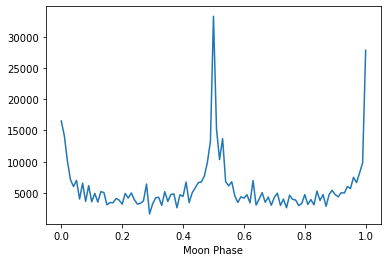

In [10]:
# line graph, moon phases vs 911 call volume

emergency_count = group_moon_phase["Emergency Reason"].count()
moon_line = emergency_count.plot(kind = "line")

moon_line


In [11]:
# bin or remove
# 0 – new moon
# 0-0.25 – waxing crescent
# 0.25 – first quarter
# 0.25-0.5 – waxing gibbous
# 0.5 – full moon
# 0.5-0.75 – waning gibbous
# 0.75 – last quarter
# 0.75-1 – waning crescent


In [12]:
# Line graph with years or years analysis

# werewolf_df["Year"] = pd.DatetimeIndex(werewolf_df['Date']).year
werewolf_df["Year"] = pd.DatetimeIndex(werewolf_df.loc[:,"Date"]).year

group_year = werewolf_df.groupby("Year")
group_year["Moon Phase"].value_counts()

<ipython-input-12-4382b46e1a9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  werewolf_df["Year"] = pd.DatetimeIndex(werewolf_df.loc[:,"Date"]).year


Year  Moon Phase
2015  0.50          607
      0.46          519
      0.43          448
      0.49          447
      0.04          444
                   ... 
2019  0.42          403
      0.35          398
      0.79          378
      0.26          375
      0.64          337
Name: Moon Phase, Length: 420, dtype: int64

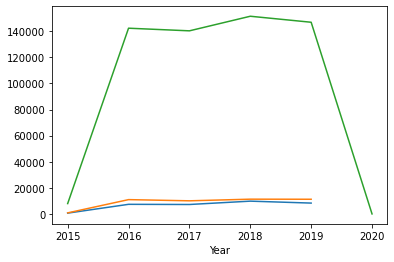

In [13]:
full_df = werewolf_df.loc[werewolf_df["Moon Phase"] == 0.5]
group_year1 = full_df.groupby("Year")
full_count = group_year1["Moon Phase"].count()
moon_line = full_count.plot(kind = "line")

new_df = werewolf_df.loc[(werewolf_df["Moon Phase"] == 0)|(werewolf_df["Moon Phase"] == 1)]
group_year2 = new_df.groupby("Year")
new_count = group_year2["Moon Phase"].count()
moon_line2 = new_count.plot(kind = "line")

other_df = werewolf_df.loc[(werewolf_df["Moon Phase"]!=0.5)|(werewolf_df["Moon Phase"]!=0)|(werewolf_df["Moon Phase"]!=1)]
group_year3 = other_df.groupby("Year")
other_count = group_year3["Moon Phase"].count()
moon_line3 = other_count.plot(kind = "line")

# year_count = group_moon_phase["Emergency Reason"].count()
# moon_line = emergency_count.plot(kind = "line")

# moon_line
# full = werewolf_df.loc[werewolf_df["Moon Phase"] == 0.5]
# new_end = werewolf_df.loc[werewolf_df["Moon Phase"]==0]
# new_begin = werewolf_df.loc[werewolf_df["Moon Phase"]==1]
# emergency_reason = werewolf_df["Emergency Reason"]
# year = werewolf_df["Year"]
# year_df = pd.DataFrame({
#     "Full Moons" : full,
#     "New Moons (Begins)": new_begin,
#     "New Moons (Ends)": new_end,
#     "Emergency Reason": emergency_reason,
#     "Year": year
# year = werewolf_df["Year"].unique()

# moon_phase = werewolf_df["Moon Phase"]
# plt.plot(year, moon_phase)

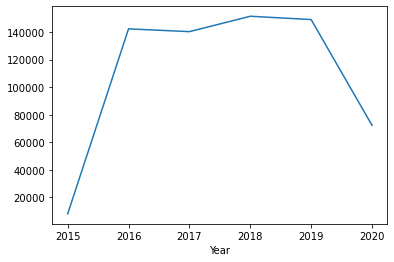